# Titanic Classification

In this notebook we will be taking the Titanic dataset from Kaggle and try several different classification methods to predict the Survival of a Passenger.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

train = pd.read_csv('data/train.csv')

First let's explore our data a little bit.

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Varible definitions:

survived: 0 = No, 1 = Yes
pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
sex: Sex	
Age: in years	
sibsp: # of siblings / spouses aboard the Titanic	
parch: # of parents / children aboard the Titanic	
ticket:	Ticket number	
fare: Passenger fare	
cabin: Cabin number	
embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Clean & analyse data
Some columns have missing data or are displayed in strings. Let's fix that.

In [24]:
pd.options.mode.chained_assignment = None #to remove a warning message

# Convert the male and female groups to integer form, add if statements for code stability
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

# Fill missing Embarked values and convert to integer form
train["Embarked"] = train["Embarked"].fillna("S")
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

# Missing data in age will be replaced with the median age
train["Age"] = train["Age"].fillna(train["Age"].median())

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


Great. Now that the data is cleaned up, let's try to find some patterns in the data to get a feel for what prediction models we can use.

<Figure size 432x288 with 0 Axes>

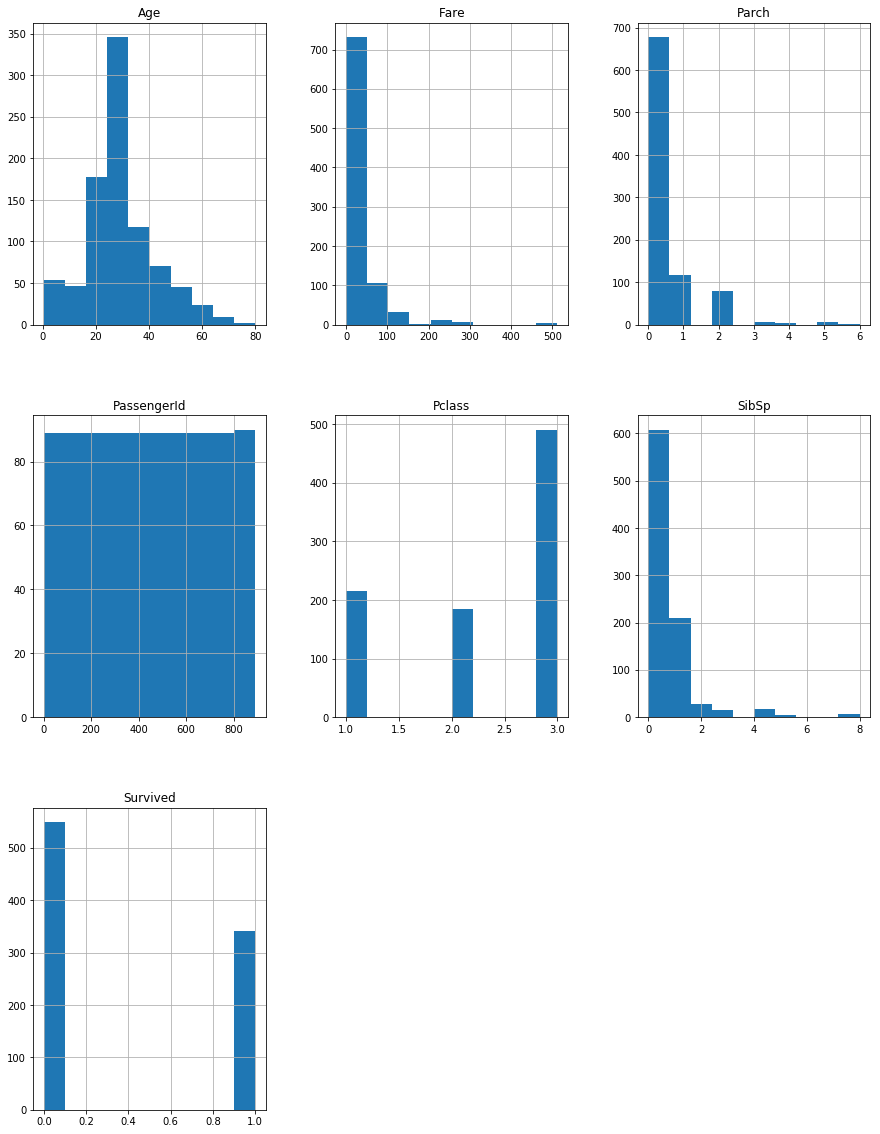

<Figure size 432x288 with 0 Axes>

In [6]:
train.hist(figsize=(15,20))
plt.figure()

Our first intuition could be that the Passenger class likely plays a role in the survival, since upper class people were more likely to be allowed on the life boats. We'll test the same assumption for age and sex.

In [12]:
# Pclass

print("Pclass: 1")
print(train["Survived"][train["Pclass"] == 1].value_counts(normalize = True))

print("Pclass: 3")
print(train["Survived"][train["Pclass"] == 3].value_counts(normalize = True))

Pclass: 1
1    0.62963
0    0.37037
Name: Survived, dtype: float64
Pclass: 3
0    0.757637
1    0.242363
Name: Survived, dtype: float64


In [13]:
# Age

# Create the column Child and assign to 'NaN'
train["Child"] = float('NaN')

# Assign 1 to passengers under 18, 0 to those 18 or older. Print the new column.
train["Child"][train["Age"] >= 18] = 0
train["Child"][train["Age"] < 18] = 1

# Print normalized Survival Rates for passengers under 18
print(train["Survived"][train["Child"] == 1].value_counts(normalize = True))

1    0.539823
0    0.460177
Name: Survived, dtype: float64


In [15]:
# Sex

print("Female:")
print(train["Survived"][train["Sex"] == 1].value_counts(normalize = True))

print("Male")
print(train["Survived"][train["Sex"] == 0].value_counts(normalize = True))

Female:
1    0.742038
0    0.257962
Name: Survived, dtype: float64
Male
0    0.811092
1    0.188908
Name: Survived, dtype: float64


We can conclude that Passenger class and Sex influenced your likelihood of Survival. Next we will try out some prediction models.

# Prediction models

Let's start with a simple decision tree model.

In [37]:
import sklearn as skl

features = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
target = train["Survived"].values

my_tree = skl.tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
my_tree = my_tree.fit(features, target)

print(my_tree.feature_importances_)
print(my_tree.score(features, target))

[0.14130255 0.17906027 0.41616727 0.17938711 0.05039699 0.01923751
 0.0144483 ]
0.9057239057239057


In [26]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.703770,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [38]:
# Import and Fix test set data
test = pd.read_csv('data/test.csv')

test.Fare[152] = test.Fare.median()

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

test["Embarked"] = test["Embarked"].fillna("S")
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

test["Age"] = test["Age"].fillna(test["Age"].median())

# Extract the features from the test set
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Make your prediction using the test set
my_prediction = my_tree.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("decisiontree_solution.csv", index_label = ["PassengerId"])

This solution scores 76% on Kaggle.

Now let's try a Random Forest classification.

In [42]:
from sklearn.ensemble import RandomForestClassifier

features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split = 2, n_estimators = 100, random_state = 1)
my_forest = forest.fit(features_forest, target)

# Print the score of the fitted random forest
print(my_forest.score(features_forest, target))

# Compute predictions on our test set features then print the length of the prediction vector
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId = np.array(test["PassengerId"]).astype(int)
forest_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])

# Write your solution to a csv file with the name my_solution.csv
forest_solution.to_csv("randomforest_solution.csv", index_label = ["PassengerId"])

0.9393939393939394


This solution scores around 75% on Kaggle, so it's not necessarily better than the simple Decision tree.